In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats

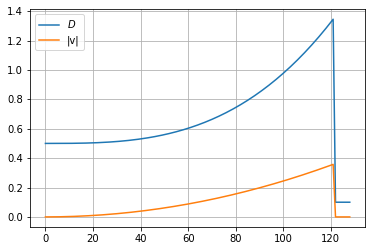

In [10]:
x=np.linspace(0.0,1.0,129)
D=np.piecewise( x, [x < 0.95,x > 0.95], [lambda x:0.5+ (x**3 ),0.1])
v=np.piecewise( x, [x < 0.95,x > 0.95], [lambda x:(x**2)*0.4,0.0])

plt.plot(D,label=r"$D$")
plt.plot(v, label=r"|v|")
plt.grid()
plt.legend()

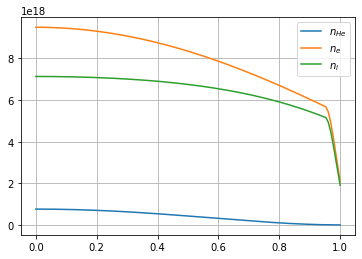

In [11]:
n_0=0.95e19
w=2
def n_core(x):return n_0*((1-(x/w)**2)**2)
def n_ped(x):return n_0*((1-(0.95/w)**2)**2)*np.exp(-((x-0.95)*20)**2)
n_e=np.piecewise(x,[x<0.95,x>0.95],[n_core,n_ped])
n_He=0.08 * n_0*(1-x**2)**2
n_Be=0.02*n_e
n_Ar=0.0005*n_e
n_i=n_e - (n_Be*4+n_Ar*18+n_He*2) 
plt.plot(x,n_He,label=r"$n_{He}$" )
plt.plot(x,n_e,label=r"$n_e$" )
plt.plot(x,n_i,label=r"$n_i$" )
plt.legend()
plt.grid()

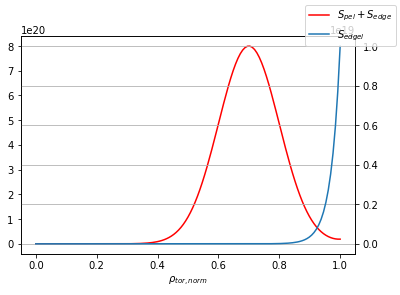

In [12]:
S_pel=scipy.stats.norm.pdf((x-0.7)/0.1)*np.sqrt(scipy.constants.pi*2.0)*1.0e19*80
S_edge=np.piecewise(x, [x<0.7, x > 0.7],[0,lambda x: (np.exp((x-0.7)/0.03-10 )*1.0e19-1.0)])

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$\rho_{tor,norm}$")
ax1.plot(x,S_pel+S_edge,label=r"$S_{pel}+S_{edge}$",color="r")
ax2 = ax1.twinx()
ax2.plot(x,S_edge,label=r"$S_{edgel}$")
fig.legend()
plt.grid()


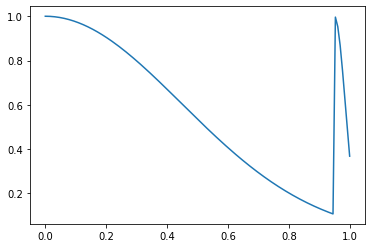

In [21]:
Te=np.piecewise(x, [x<0.95, x >= 0.95],[lambda x:np.exp(-x**2/0.4  ) ,lambda x:np.exp(-((x-0.95)*20)**2)])
plt.plot(x,Te,label=r"$T_{e}$")


In [8]:
x=np.linspace(0,1,129)
y=np.zeros(200)
z=np.ones( 129)


In [4]:
y.resize(x.shape)

In [12]:
x.data

In [14]:
z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
np.copyto(x,z)

In [17]:
x.co

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
d=np.ndarray([5,6])

In [19]:
d.size

30

In [20]:
d.shape

(5, 6)

In [23]:
d.resize(20,refcheck=False)

In [27]:
help(np.ndarray.__new__)

Help on built-in function __new__:

__new__(*args, **kwargs) method of builtins.type instance
    Create and return a new object.  See help(type) for accurate signature.



In [15]:

class InfoArray(np.ndarray):

    def __new__(subtype,*args,**kwargs):
        # Create the ndarray instance of our type, given the usual
        # ndarray input arguments.  This will call the standard
        # ndarray constructor, but return an object of our type.
        # It also triggers a call to InfoArray.__array_finalize__
        obj = super(InfoArray, subtype).__new__(subtype,(3,0))
        # set the new 'info' attribute to the value passed
        # Finally, we must return the newly created object:
        return obj

    def __array_finalize__(self, obj):
        # ``self`` is a new object resulting from
        # ndarray.__new__(InfoArray, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. InfoArray():
        #    obj is None
        #    (we're in the middle of the InfoArray.__new__
        #    constructor, and self.info will be set when we return to
        #    InfoArray.__new__)
        if obj is None: return
        # From view casting - e.g arr.view(InfoArray):
        #    obj is arr
        #    (type(obj) can be InfoArray)
        # From new-from-template - e.g infoarr[:3]
        #    type(obj) is InfoArray
        #
        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'info', because this
        # method sees all creation of default objects - with the
        # InfoArray.__new__ constructor, but also with
        # arr.view(InfoArray).
        self.info = getattr(obj, 'info', None)
        # We do not need to return anything

In [16]:
obj = InfoArray(shape=(3,)) # explicit constructor


In [4]:
x=np.linspace(0.0,1.0,129)
def foo(x):
    return x+1

In [5]:
foo(x)

array([1.       , 1.0078125, 1.015625 , 1.0234375, 1.03125  , 1.0390625,
       1.046875 , 1.0546875, 1.0625   , 1.0703125, 1.078125 , 1.0859375,
       1.09375  , 1.1015625, 1.109375 , 1.1171875, 1.125    , 1.1328125,
       1.140625 , 1.1484375, 1.15625  , 1.1640625, 1.171875 , 1.1796875,
       1.1875   , 1.1953125, 1.203125 , 1.2109375, 1.21875  , 1.2265625,
       1.234375 , 1.2421875, 1.25     , 1.2578125, 1.265625 , 1.2734375,
       1.28125  , 1.2890625, 1.296875 , 1.3046875, 1.3125   , 1.3203125,
       1.328125 , 1.3359375, 1.34375  , 1.3515625, 1.359375 , 1.3671875,
       1.375    , 1.3828125, 1.390625 , 1.3984375, 1.40625  , 1.4140625,
       1.421875 , 1.4296875, 1.4375   , 1.4453125, 1.453125 , 1.4609375,
       1.46875  , 1.4765625, 1.484375 , 1.4921875, 1.5      , 1.5078125,
       1.515625 , 1.5234375, 1.53125  , 1.5390625, 1.546875 , 1.5546875,
       1.5625   , 1.5703125, 1.578125 , 1.5859375, 1.59375  , 1.6015625,
       1.609375 , 1.6171875, 1.625    , 1.6328125, 